# 机器学习——期末项目



吴雅妃 2210515003   

房美贤 2210515014

### 一、 任务描述与分析
**数据集**

我们选择的数据集是 *客户信用风险*，它包含了1000个样本，每个样本有21个属性和一个类别标签。属性包括了贷款人的个人信息、贷款的金额、期限、目的、信用历史等，类别标签表示贷款人的信用风险等级。

**任务**

将这个数据集用于训练和测试信用风险模型，预测贷款人的信用风险。

**目标函数**

这是一个分类任务，将贷款人的信用分类为good/bad。在分类任务中，目标函数一般可以选用交叉熵，这是由最终模型确定的，评价指标可以选用准确率或F1值。

### 二、数据可视化及统计分析

In [1]:
import pandas as pd
import numpy as np
credit=pd.read_csv("./credit_customers.csv")
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [2]:
credit.info()
print("重复的数据行数：",credit.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [3]:
# 查看数据集中是否有缺失值
print(credit.isnull().any())

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 输出描述统计表
credit.describe()
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


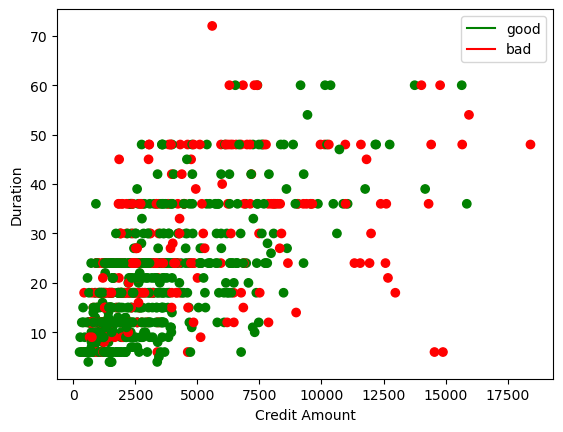

In [5]:
x_c = credit['credit_amount']
y_c = credit['duration']
c = credit['class']
color_dict = {'bad': 'red', 'good': 'green'}

scatter = plt.scatter(x_c, y_c, color=c.apply(color_dict.get), label=c)

plt.xlabel('Credit Amount')
plt.ylabel('Duration')

handle =[ plt.Line2D([0],[0],color='g',label='good'),plt.Line2D([0],[0],color='r',label='bad')]
plt.legend(handles = handle)
plt.show()

原始数据由1000个样本组成，其中每个样本中含有20个特征和1个标签(class)，特征中不存在缺失值但存在类别型数据和数值型数据，类别型数据是未编码的，需要进行编码转换。

### 三、特征工程

#### （一）数据转换
对类别型数据进行编码，首先查看各个类别型特征分别有哪几种类别，统计各个类别的占比，进而判断应该对数据进行哪种编码处理。

In [6]:
# 统计每个类别变量的比例
for var in credit.select_dtypes(include=['object']).columns:
    # 使用value_counts函数计算每个类别的频数
    frequency = credit.select_dtypes(include=['object'])[var].value_counts()
    # 计算总的观测数量
    total_count = frequency.sum()
    # 计算每个类别的比例
    proportions = frequency / total_count
    # 打印结果
    print("Variable:", var)
    print(proportions)
    print("----------------------------------------")

Variable: checking_status
no checking    0.394
<0             0.274
0<=X<200       0.269
>=200          0.063
Name: checking_status, dtype: float64
----------------------------------------
Variable: credit_history
existing paid                     0.530
critical/other existing credit    0.293
delayed previously                0.088
all paid                          0.049
no credits/all paid               0.040
Name: credit_history, dtype: float64
----------------------------------------
Variable: purpose
radio/tv               0.280
new car                0.234
furniture/equipment    0.181
used car               0.103
business               0.097
education              0.050
repairs                0.022
domestic appliance     0.012
other                  0.012
retraining             0.009
Name: purpose, dtype: float64
----------------------------------------
Variable: savings_status
<100                0.603
no known savings    0.183
100<=X<500          0.103
500<=X<1000         0.063


根据上述结果，选择对一些无序的类别变量进行独热编码。

In [7]:
data=pd.get_dummies(credit,columns=['purpose', 'personal_status',"other_parties","property_magnitude"])

但是为了避免维数灾难，不能对所有变量进行独热编码，因此对另外一些有序的以及只有两种类别的分类变量进行自定义编码

In [8]:
cols = ['checking_status','credit_history', 'savings_status', 'employment', 'other_payment_plans','housing', 
        'job','own_telephone','foreign_worker','class']
# 映射字典
col_dicts = {}
col_dicts = {
  'checking_status': {
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
  },
             
  'credit_history': {
      'existing paid': 0,
      'critical/other existing credit': 1,
      'delayed previously': 2,
      'all paid': 3,
      'no credits/all paid': 4
  },

'savings_status': {
      'no known savings': 0,
      '<100': 1,
      '100<=X<500': 2,
      '500<=X<1000': 3,
      '>=1000': 4
  },

 'employment': {
  'unemployed': 0,
  '<1': 1,
  '1<=X<4': 2,
  '4<=X<7': 3,
  '>=7': 4
  },

'other_payment_plans':{
    'none':0,
    'bank':1,
    'stores':2
},
      
 'housing': {'for free': 0, 'rent': 1, 'own': 2},

 'job': {
  'unemp/unskilled non res': 0,
  'unskilled resident': 1,
  'skilled': 2,
  'high qualif/self emp/mgmt': 3
  },

  'own_telephone': {'none': 0, 'yes': 1},

  'foreign_worker': {'no': 1, 'yes': 0},

  'class': {'bad': 0, 'good': 1}
 }


for col in cols:
    data[col] = credit[col].map(lambda x: x.strip())
    data[col] = credit[col].map(col_dicts[col])

In [9]:
# 打印编码后的数据集
data

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
0,1,6.0,1,1169.0,0,4,4.0,4.0,67.0,0,...,0,0,1,0,0,1,0,0,0,1
1,2,48.0,0,5951.0,1,2,2.0,2.0,22.0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,12.0,1,2096.0,1,3,2.0,3.0,49.0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,42.0,0,7882.0,1,3,2.0,4.0,45.0,0,...,0,0,1,0,1,0,0,1,0,0
4,1,24.0,2,4870.0,1,2,3.0,4.0,53.0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12.0,0,1736.0,1,3,3.0,4.0,31.0,0,...,0,0,0,0,0,1,0,0,0,1
996,1,30.0,0,3857.0,1,2,4.0,4.0,40.0,0,...,1,0,0,0,0,1,0,1,0,0
997,0,12.0,0,804.0,1,4,4.0,4.0,38.0,0,...,0,0,1,0,0,1,1,0,0,0
998,1,45.0,0,1845.0,1,2,4.0,4.0,23.0,0,...,0,0,1,0,0,1,0,0,1,0


In [10]:
# 设特征集和目标变量
y = data["class"]
feature_vars = data.drop('class', axis=1).columns
X = data[feature_vars]


#### （二）描述性统计分析

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 输出描述统计表
statistics = data.describe()
statistics

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.001000,20.903000,0.776000,3271.258000,1.190000,2.384000,2.973000,2.845000,35.546000,0.233000,...,0.050000,0.092000,0.54800,0.041000,0.052000,0.907000,0.332000,0.23200,0.154000,0.282000
std,0.957034,12.058814,1.060636,2822.736876,0.966869,1.208306,1.118715,1.103718,11.375469,0.522479,...,0.218054,0.289171,0.49794,0.198389,0.222138,0.290578,0.471167,0.42232,0.361129,0.450198
min,0.000000,4.000000,0.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,1365.500000,1.000000,2.000000,2.000000,2.000000,27.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,18.000000,0.000000,2319.500000,1.000000,2.000000,3.000000,3.000000,33.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,24.000000,1.000000,3972.250000,1.000000,4.000000,4.000000,4.000000,42.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000
max,3.000000,72.000000,4.000000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,2.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


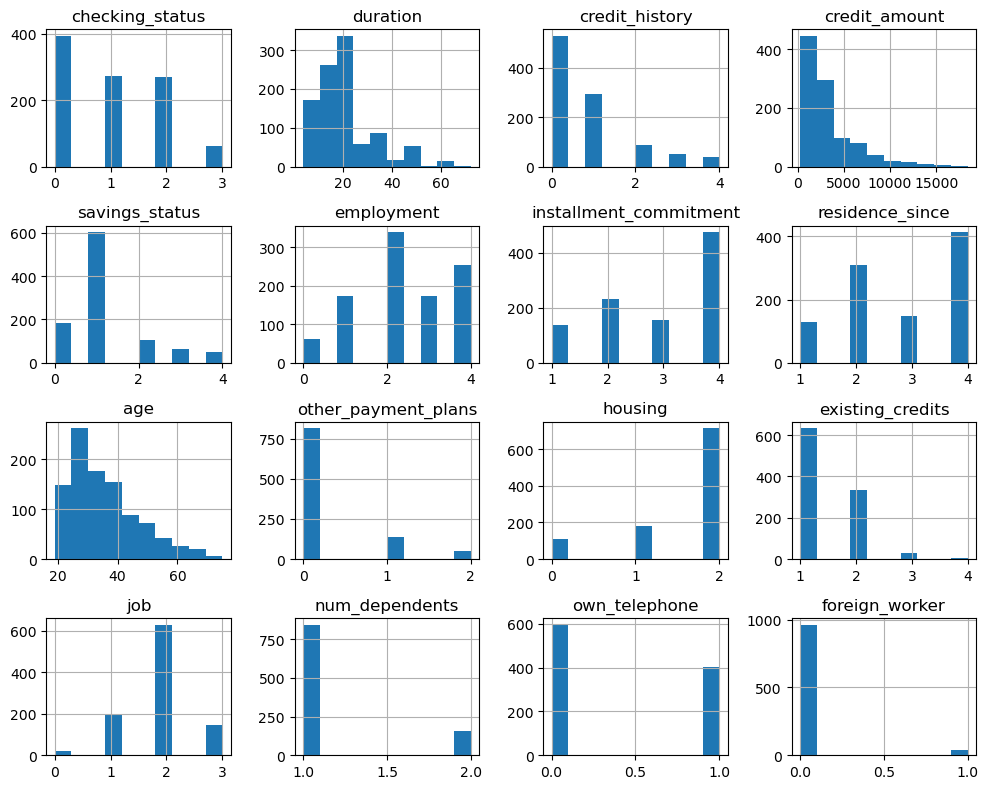

In [12]:
# 直方图
# 选择前几列变量，剔除独热编码的变量
plot_vars = data.columns[:16]
# 构建直方图
data[plot_vars].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [13]:
# 计算数值型变量与分类目标变量之间的相关系数（皮尔逊相关系数）
numeric_vars = ['duration', 'credit_amount', 'installment_commitment','residence_since','age','existing_credits','num_dependents']  # 数值型变量
correlation_matrix = data[numeric_vars + ["class"]].corr()
# 相关系数矩阵
correlation_matrix

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.214927
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.154739
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.072404
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.045732
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.003015
class,-0.214927,-0.154739,-0.072404,-0.002967,0.091127,0.045732,0.003015,1.000000


**热力图**

为更直观地展现数值型变量与分类变量之间的相关性，绘制热力图。

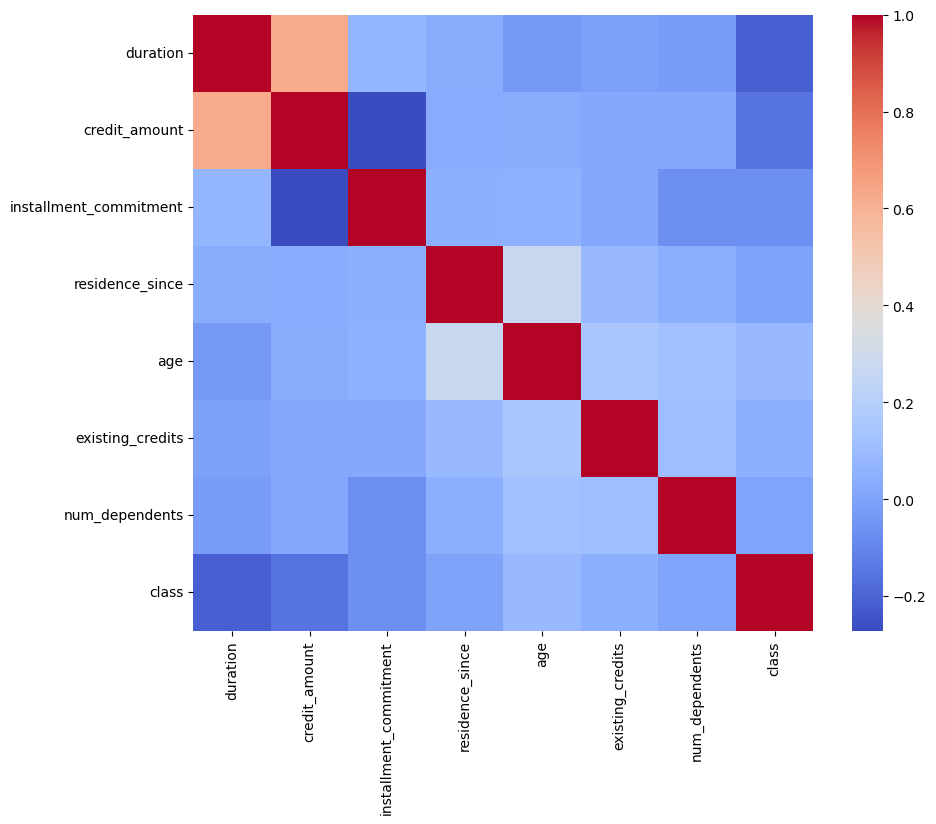

In [14]:
# 热力图
correlation_matrix = data[numeric_vars + ["class"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=None, cmap='coolwarm')
plt.show()


可见，数值型变量间的相关性不强，并且，与分类目标之间的相关性也较低，相关系数绝对值基本在0.2以下。这可能是因为目标变量是分类变量，还需进一步分析。尝试计算特征和目标变量之间的互信息，

In [15]:
data.drop('class', axis=1).columns.tolist()

['checking_status',
 'duration',
 'credit_history',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'residence_since',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'purpose_business',
 'purpose_domestic appliance',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_new car',
 'purpose_other',
 'purpose_radio/tv',
 'purpose_repairs',
 'purpose_retraining',
 'purpose_used car',
 'personal_status_female div/dep/mar',
 'personal_status_male div/sep',
 'personal_status_male mar/wid',
 'personal_status_male single',
 'other_parties_co applicant',
 'other_parties_guarantor',
 'other_parties_none',
 'property_magnitude_car',
 'property_magnitude_life insurance',
 'property_magnitude_no known property',
 'property_magnitude_real estate']

In [16]:
from sklearn.feature_selection import mutual_info_classif
# 计算特征和目标的互信息
mutual_info = mutual_info_classif(data[X.columns.tolist()],data["class"])
selected_features=[]
print("\nMutual Information:")
for i, info in enumerate(sorted(mutual_info,reverse=True)):
    if info > 0:
        print(f"{X.columns[i]}: {info}")
        selected_features.append(f'{X.columns[i]}')
selected_features


Mutual Information:
checking_status: 0.04157282438317633
duration: 0.03741181292034823
credit_history: 0.032330143511307474
credit_amount: 0.025166973120445357
savings_status: 0.020335918630861594
employment: 0.020067346628563465
installment_commitment: 0.019860743979041695
residence_since: 0.014748157520121596
age: 0.014517462255493552
other_payment_plans: 0.013280167289213995
housing: 0.012123364207758724
existing_credits: 0.010859029881543636
job: 0.008443471870090535
num_dependents: 0.0066579507713300234
own_telephone: 0.005132094728059977
foreign_worker: 0.00506004053498077
purpose_business: 0.004379082003988843
purpose_domestic appliance: 0.0036418785599878767


['checking_status',
 'duration',
 'credit_history',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'residence_since',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'purpose_business',
 'purpose_domestic appliance']

我们通过计算特征与目标变量之间的互信息筛选出一个互信息不为0的特征子集。

互信息（Mutual Information）：互信息是一种非线性相关性度量，用于衡量两个变量之间的信息共享程度。它可以用于衡量数值型变量和二分类变量之间的关联程度。


### 四、模型训练

#### （一）划分数据集

In [17]:
from sklearn.model_selection import train_test_split
# 先将X设为互信息不为0的特征子集
X=X[selected_features]
# 将数据集分为0.8的训练集和0.2的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # 再将测试集分为0.5的测试集和0.5的验证集，相当于原始数据集的0.1和0.1
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# 打印各个数据集的形状
print(X_train.shape)
print(X_test.shape)

(900, 18)
(100, 18)


#### （二）模型与评估

**性能指标**

- 准确率 accuracy   
- AUC

**类别不平衡处理**

根据前面对类别变量的类比占比统计结果，可以看到目标变量中good与bad的比例为**7：3**，存在不平衡，由于在实际应用中将信用不好的客户判断为好，可能带来较大的损失，应更将关注较少数的信用不好的情况。因此，我们在模型拟合过程中对样本权重进行调整，将信用好的样本权重设为**0.8**，信用不好的样本权重设为**1**，这是一种正则化的方法，可以改变损失函数或评估指标对不同样本的敏感度，从而影响模型参数的更新方向和幅度。另外。也使得模型将更加关注信用不好的样本情况，从而提高模型性能。


In [18]:
# 导入相关模型的sklearn包
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV

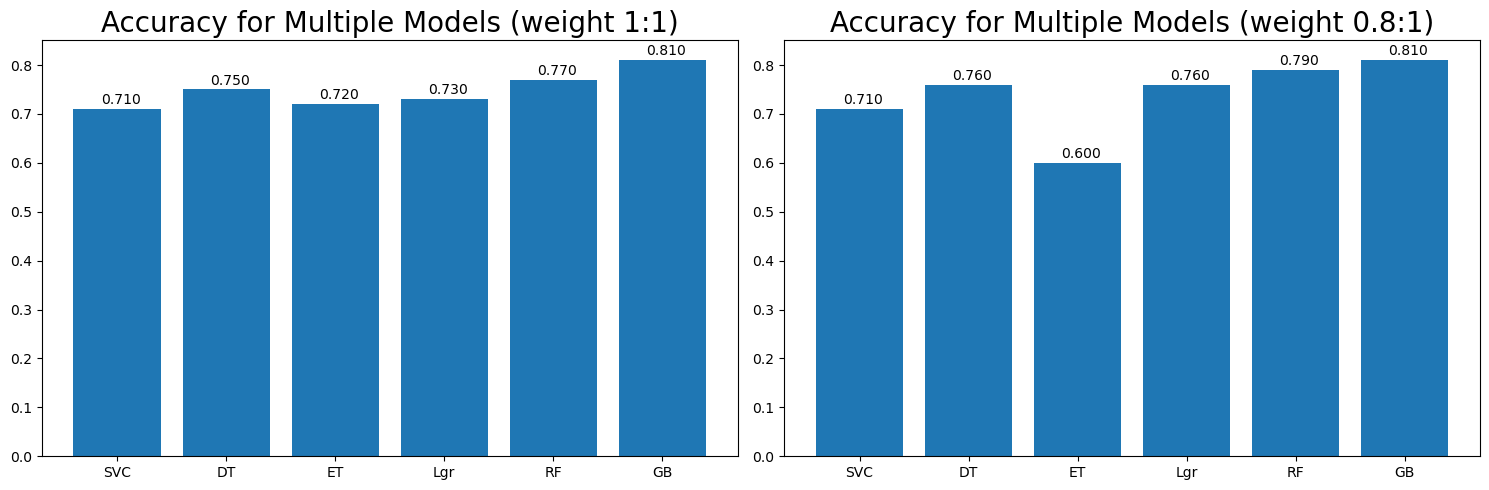

<function matplotlib.pyplot.show(close=None, block=None)>

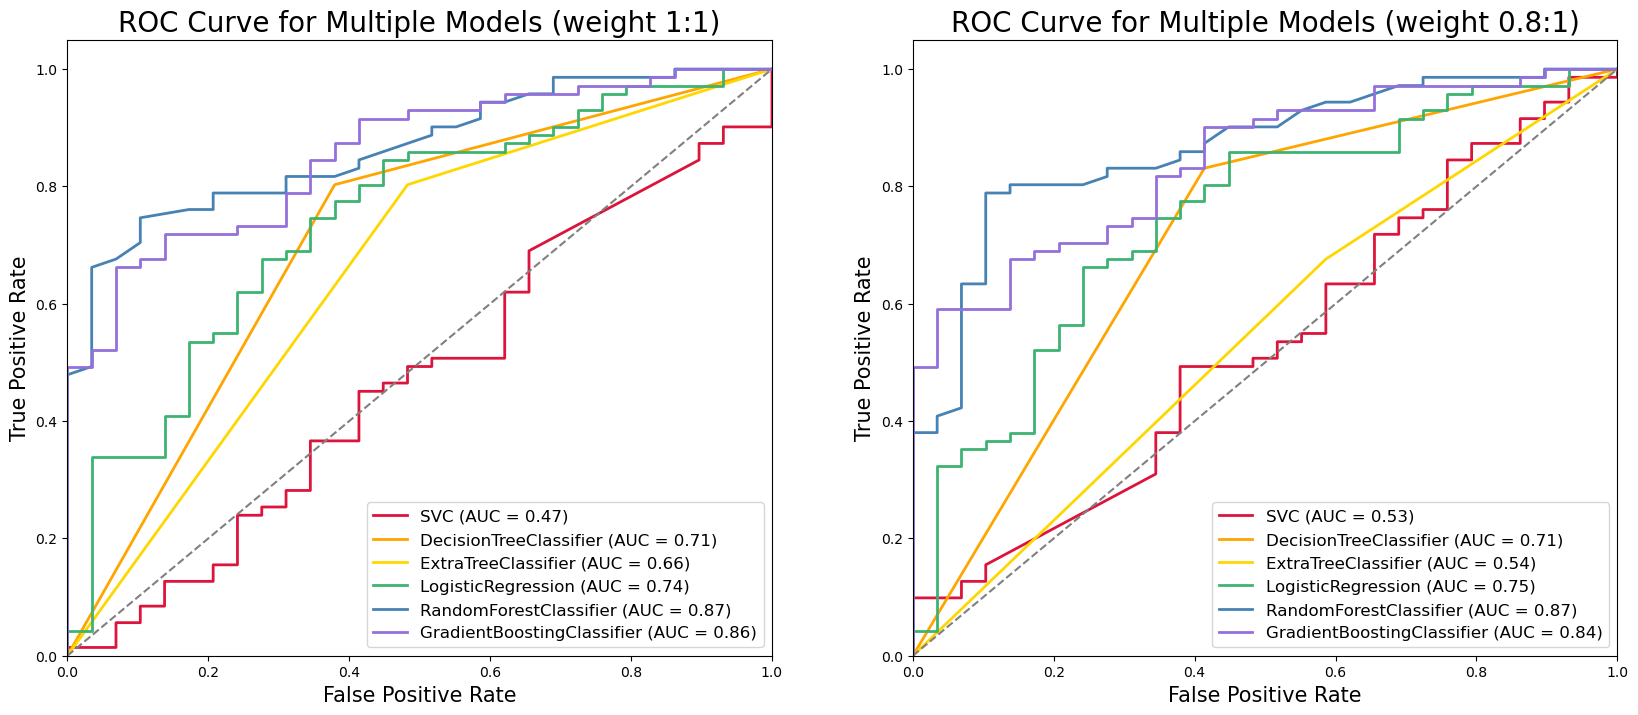

In [19]:
# 绘制准确率直方图
# 对模型进行权重调整
class_weight = {1:1, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
models = [SVC(gamma='auto', probability=True),DecisionTreeClassifier(), 
          ExtraTreeClassifier(), LogisticRegression(), RandomForestClassifier(), 
          GradientBoostingClassifier()]
# 训练每个算法模型并进行预测
accuracies = []
for model in models:
    model.fit(X_train, y_train,sample_weight=sample_weight_vect)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(15,5))
# 创建第一个子图，位置是2行1列的第一个
plt.subplot(1,2,1)
plt.bar(range(len(models)), accuracies)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('Accuracy for Multiple Models (weight 1:1)', fontsize=20)
# 在每个直方上方添加文本标签，显示高度
for x, y in enumerate(accuracies):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)

# 对模型进行权重调整
class_weight = {1:0.84, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
models1 = [SVC(gamma='auto', probability=True),DecisionTreeClassifier(), ExtraTreeClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
# 训练每个算法模型并进行预测
accuracies1 = []
for model in models1:
    model.fit(X_train, y_train,sample_weight=sample_weight_vect)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies1.append(accuracy)
    # print(model,':',accuracy)
# 绘制准确率直方图
plt.subplot(1,2,2)
plt.bar(range(len(models1)), accuracies1)
plt.xticks(range(len(models1)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('Accuracy for Multiple Models (weight 0.8:1)', fontsize=20)
for x, y in enumerate(accuracies1):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)
# 调整子图之间的间距
plt.tight_layout()
plt.show()


# 创建新画布绘制每个模型的roc曲线
plt.figure(figsize=(20,8), dpi=100)
plt.subplot(1,2,1)
colors = ['crimson', 'orange', 'gold', 'mediumseagreen', 'steelblue', 'mediumpurple']
for model, color in zip(models, colors):
    y_score = model.predict_proba(X_test)[:, 1] # 获取预测概率
    fpr, tpr, thresholds = roc_curve(y_test, y_score) # 计算fpr和tpr
    auc_value = auc(fpr, tpr) # 计算auc值
    plt.plot(fpr, tpr, lw=2, label=model.__class__.__name__ + ' (AUC = %.2f)' % auc_value, color=color) # 绘制roc曲线并设置标签
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Multiple Models (weight 1:1)', fontsize=20)
plt.legend(loc='lower right', fontsize=12)

# 创建新画布绘制每个模型的roc曲线
plt.subplot(1,2,2)
colors = ['crimson', 'orange', 'gold', 'mediumseagreen', 'steelblue', 'mediumpurple']
for model, color in zip(models1, colors):
    y_score = model.predict_proba(X_test)[:, 1] # 获取预测概率
    fpr, tpr, thresholds = roc_curve(y_test, y_score) # 计算fpr和tpr
    auc_value = auc(fpr, tpr) # 计算auc值
    plt.plot(fpr, tpr, lw=2, label=model.__class__.__name__ + ' (AUC = %.2f)' % auc_value, color=color) # 绘制roc曲线并设置标签
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Multiple Models (weight 0.8:1)', fontsize=20)
plt.legend(loc='lower right', fontsize=12)
plt.show
# 保存或显示图像
# plt.savefig('roc.png')

可以看到各个模型在测试集上的预测准确率最高的是**RandomForestClassifier**和**GradientBoostingClassifier**，分别为**0.8**和**0.84**。

绘制ROC曲线进行评估，可见，**AUC**最高的为**GradientBoostingClassifier**，达到了0.87，说明该模型在区分正类和负类方面有很好的表现。

接着选取该模型，对特征重要性进行排序与可视化。

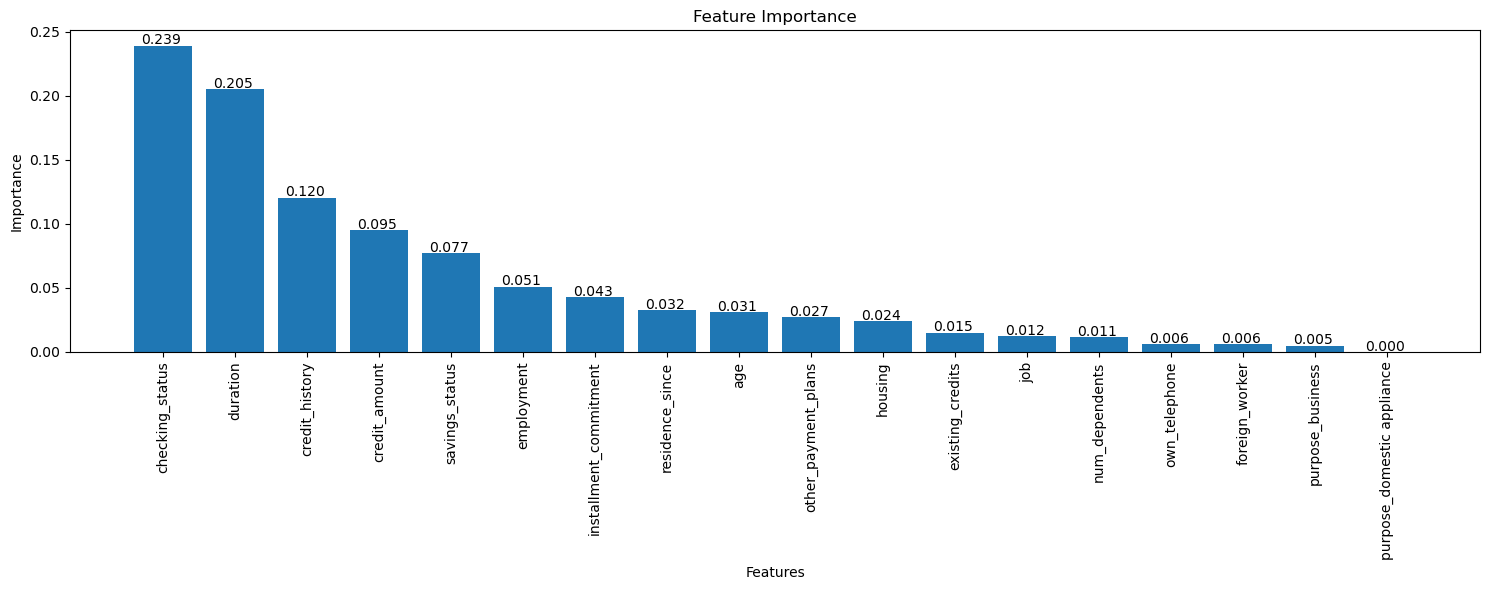

In [20]:
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)
importance = GB.feature_importances_
# 获取数据集中的特征名称
feature_names = X_train.columns
# 可视化特征重要性
plt.figure(figsize=(15, 6))
plt.bar(range(len(importance)), sorted(importance,reverse=True), tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
# 在每个直方上方添加文本标签，显示高度
for x, y in enumerate(sorted(importance, reverse=True)):
 plt.text(x - 0.3 , y + 0.001, '%.3f' % y)

# 调整子图之间的间距
plt.tight_layout()
plt.show()


**交叉验证法**

使用10折交叉验证和网格搜索来优化RF和GB模型。

In [21]:
# 使用RF模型进行训练和预测
# 根据之前的结果，选择调整过比例的RF模型和未经调整比例的GB模型。
rf = RandomForestClassifier()
class_weight = {1:0.84, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
rf.fit(X_train, y_train,sample_weight=sample_weight_vect)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# 使用GB模型进行训练和预测
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

# 计算并打印准确率和AUC值
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

print(f'RF accuracy: {acc_rf:.4f}, AUC: {auc_rf:.4f}')
print(f'GB accuracy: {acc_gb:.4f}, AUC: {auc_gb:.4f}')

RF accuracy: 0.7900, AUC: 0.8507
GB accuracy: 0.8100, AUC: 0.8558


In [22]:
# 使用交叉验证来评估RF模型的性能
print('交叉验证评估模型性能')
rf1 = RandomForestClassifier()
acc_rf = cross_val_score(rf1, X_train, y_train, cv=10, scoring='accuracy')
auc_rf = cross_val_score(rf1, X_train, y_train, cv=10, scoring='roc_auc')
print(f'RF accuracy: {acc_rf.mean():.4f}')
print(f'RF AUC: {auc_rf.mean():.4f}')

# 使用交叉验证来评估GB模型的性能
gb1 = GradientBoostingClassifier()
acc_gb = cross_val_score(gb1, X_train, y_train, cv=10, scoring='accuracy')
auc_gb = cross_val_score(gb1, X_train, y_train, cv=10, scoring='roc_auc')

print(f'GB accuracy: {acc_gb.mean():.4f}')
print(f'GB AUC: {auc_gb.mean():.4f}')
print(' ')
print('网格搜索调整超参数')

# 使用网格搜索来调整RF模型的超参数
rf_params = {'n_estimators': [50, 100, 150 ], 'max_depth': [5, 10, 15, None ], 'max_features': ['auto', 'sqrt', 'log2']}
rf_grid_acc = GridSearchCV(rf, rf_params, cv=10, scoring='accuracy')
rf_grid_roc = GridSearchCV(rf, rf_params, cv=10, scoring='roc_auc')
rf_grid_acc = rf_grid_acc.fit(X_train, y_train)
rf_grid_roc = rf_grid_roc.fit(X_train, y_train)
print(f'Best RF parameters (accuracy): {rf_grid_acc.best_params_},Best RF accuracy: {rf_grid_acc.best_score_:.4f}')
print(f'Best RF parameters (AUC): {rf_grid_roc.best_params_},Best RF AUC: {rf_grid_roc.best_score_:.4f}')

# 使用网格搜索来调整GB模型的超参数
gb_params = {'n_estimators': [50, 100, 150 ], 'max_depth': [3, 5, 10, 15], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid_acc = GridSearchCV(rf, rf_params, cv=10, scoring='accuracy')
gb_grid_roc = GridSearchCV(rf, rf_params, cv=10, scoring='roc_auc')
gb_grid_acc = gb_grid_acc.fit(X_train, y_train)
gb_grid_roc = gb_grid_roc.fit(X_train, y_train)
print(f'Best gb parameters (accuracy): {gb_grid_acc.best_params_}, Best gb accuracy: {gb_grid_acc.best_score_:.4f}')
print(f'Best gb parameters (AUC): {gb_grid_roc.best_params_},Best gb AUC: {gb_grid_roc.best_score_:.4f}')

交叉验证评估模型性能
RF accuracy: 0.7478
RF AUC: 0.7743
GB accuracy: 0.7422
GB AUC: 0.7641
 
网格搜索调整超参数
Best RF parameters (accuracy): {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150},Best RF accuracy: 0.7622
Best RF parameters (AUC): {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100},Best RF AUC: 0.7768
Best gb parameters (accuracy): {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150}, Best gb accuracy: 0.7678
Best gb parameters (AUC): {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 150},Best gb AUC: 0.7775


In [23]:
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

y_pred_gb_roc = gb_grid_roc.predict(X_test)
y_prob_gb_roc = gb_grid_roc.predict_proba(X_test)[:,1]

y_pred_gb_acc = gb_grid_acc.predict(X_test)
y_prob_gb_acc = gb_grid_acc.predict_proba(X_test)[:,1]

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

y_pred_rf_roc = gb_grid_roc.predict(X_test)
y_prob_rf_roc = gb_grid_roc.predict_proba(X_test)[:,1]

y_pred_rf_acc = rf_grid_acc.predict(X_test)
y_prob_rf_acc = rf_grid_acc.predict_proba(X_test)[:,1]
# 计算并打印准确率和AUC值
acc_rf1 = accuracy_score(y_test, y_pred_rf)
auc_rf1 = roc_auc_score(y_test, y_prob_rf)
acc_rf2 = accuracy_score(y_test, y_pred_rf_roc)
auc_rf2 = roc_auc_score(y_test, y_prob_rf_roc)
acc_rf3 = accuracy_score(y_test, y_pred_rf_acc)
auc_rf3 = roc_auc_score(y_test, y_prob_rf_acc)

acc_gb1 = accuracy_score(y_test, y_pred_gb)
auc_gb1 = roc_auc_score(y_test, y_prob_gb)
auc_gb2 = accuracy_score(y_test, y_pred_gb_roc)
acc_gb2 = roc_auc_score(y_test, y_prob_gb_roc)
acc_gb3 = accuracy_score(y_test, y_pred_gb_acc)
auc_gb3 = roc_auc_score(y_test, y_prob_gb_acc)

print(f'RF1 accuracy: {acc_rf1:.4f}, RF2 accuracy: {acc_rf2:.4f}, RF2 accuracy: {acc_rf3:.4f}')

print(f'RF1 AUC: {auc_rf1:.4f}, RF2 AUC: {auc_rf2:.4f}, RF2 AUC: {auc_rf3:.4f}')

print(f'GB1 accuracy: {acc_gb1:.4f}, GB2 accuracy: {acc_gb2:.4f}, GB3 accuracy: {acc_gb3:.4f}')

print(f'GB1 AUC: {auc_gb1:.4f}, GB2 AUC: {auc_gb2:.4f}, GB3 AUC: {auc_gb3:.4f}')

RF1 accuracy: 0.7900, RF2 accuracy: 0.8000, RF2 accuracy: 0.8000
RF1 AUC: 0.8507, RF2 AUC: 0.8616, RF2 AUC: 0.8499
GB1 accuracy: 0.8100, GB2 accuracy: 0.8616, GB3 accuracy: 0.7700
GB1 AUC: 0.8558, GB2 AUC: 0.8000, GB3 AUC: 0.8577


经过交叉验证法调优后，得到的最佳模型为**GB2**：GradientBoostingClassifier()。

它的准确率可以达到：**86.16%**，AUC ：**0.8** 

### 五、 总结

#### （一）算法比较

**GradientBoostingClassifier**和**RandomForestClassifier**都是基于决策树的集成学习方法，实验过程中发现它们的区别如下：

核心思想
- GradientBoostingClassifier是一种**提升**方法，它通过迭代地拟合残差的负梯度来优化任意可微分的损失函数。
- RandomForestClassifier是一种**随机森林**方法，它通过对多个独立的决策树进行平均或投票来降低方差。
- GradientBoostingClassifier是一种**串行**的算法，每一棵树都依赖于前一棵树的结果。
- RandomForestClassifier是一种**并行**的算法，每一棵树都可以独立地训练。

超参数
- GradientBoostingClassifier主要通过调整学习率、子采样比例、正则化项等参数来控制拟合过程。
- RandomForestClassifier主要通过调整树的数量、最大深度、最小叶子节点数等参数来控制拟合过程。

速度：
- GradientBoostingClassifier通常需要更多的时间和内存来训练和预测，因为它需要多次迭代和梯度计算。
- RandomForestClassifier通常比较快速和节省内存，因为它只需要一次训练和预测。

对样本扰动敏感度：
- RandomForestClassifier对类别不平衡的数据更敏感，出现类别不平衡需要进行处理后再使用随机森林。

#### （二）算法改进方向

- 特征筛选

根据**特征重要性排序图**，可以看到有一些特征对分类的贡献非常微弱，可以考虑再次进行特征筛选，再做分类，可以加快模型拟合的速度。

- 超参数调优

除了网格搜索，还可以使用**贝叶斯优化**的方法来进行调优。

- 类别不平衡

除了正则化的方法，还可以通过**重采样**的方式进行类别平衡。